<a href="https://colab.research.google.com/github/ZhizhchenkoA/27/blob/main/27_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***27 задание ЕГЭ по информатике***

Примеры решения 27 задач из ЕГЭ по информатике

In [ ]:
import requests

class PseudoFile:
    def __init__(self, x):
        self.x = x

    def readline(self):
        return next(self.x)

    def readlines(self):
        return [i for i in self.x]

    def __enter__(self, *args, **kwargs):
        return self

    def __iter__(self):
        return self.x

    def __next__(self):
        return next(self.x)

    def __exit__(self,  exc_type, exc_val, exc_tb):
        if exc_type:
            raise exc_type
        return False



def fopen(s: str):
    """Загрузка файлов из интернета"""

    x = requests.get(s).text.strip().split("\n")
    return PseudoFile(iter(x))


In [ ]:
def dopen(s: str):
    """Загрузка файлов с Google Drive"""

    return open(f"/drive/MyDrive/27/{s}")

# Задачи

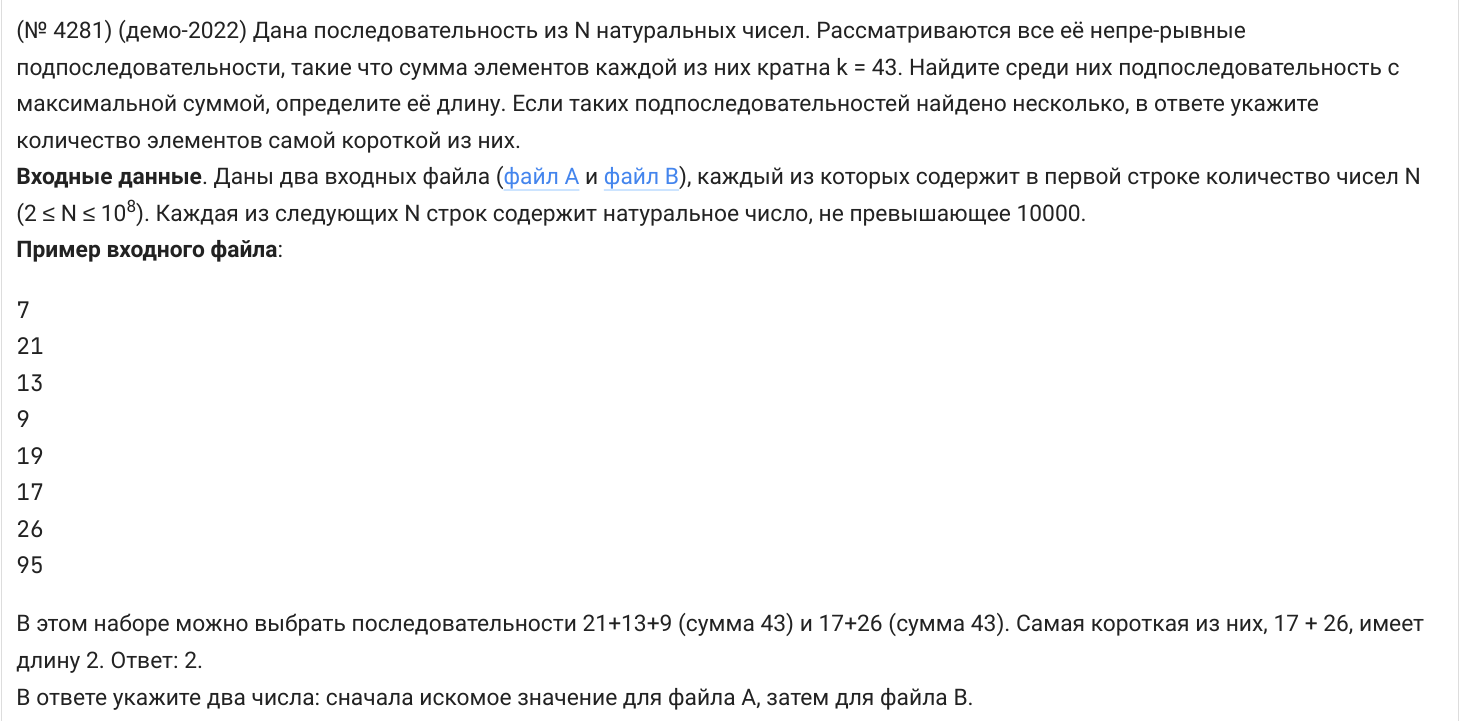

In [ ]:
# переборное решение
with fopen('https://kpolyakov.spb.ru/cms/files/ege-stream/75/27-75a.txt') as f:
    n = int(f.readline())
    D = 43
    max_s = 0
    min_l = float("inf")

    k = [int(i) for i in f]
    for i in range(n - 1):
        s = 0
        for j in range(i, n):
            s += k[j]
            if s % D == 0 and (s > max_s or (s == max_s and j - i + 1 < min_l)):
                min_l = j - i + 1
                max_s = s
    print(min_l)

185


In [ ]:
# решение через метод частичных сумм
with fopen('https://kpolyakov.spb.ru/cms/files/ege-stream/75/27-75b.txt') as f:
    n = int(f.readline())
    s = [[0, 0]]
    D = 43
    max_s = 0
    min_l = float("inf")
    for i in range(n):
        x = int(f.readline())
        combs = [[a + x, b + 1] for a, b in s] + [[x, 1]]
        combs.sort(key=lambda a: (a[0], -a[1]))
        s = {x[0] % D: x for x in combs}.values()
        for summ, lenn in s:
            if summ % D == 0 and (summ > max_s or (summ == max_s and lenn < min_l)):
                max_s = summ
                min_l = lenn
print(min_l)

329329


In [ ]:
# решение через префиксные суммы
with fopen('https://kpolyakov.spb.ru/cms/files/ege-stream/75/27-75a.txt') as f:
    n = int(f.readline())
    D = 43
    prefs = [0] + [float("inf")] * D
    prefl = [0] * D
    max_s = 0
    min_l = float("inf")
    s = 0
    for i in range(n):
        s += int(f.readline())
        if s - prefs[s % D] > max_s or (s - prefs[s % D] == max_s and i - prefl[s % D] < min_l):
            min_l = i - prefl[s % D]
            max_s = s - prefs[s % D]
        if s < prefs[s % D]:
            prefs[s % D] = s
            prefl[s % D] = i

print(min_l)

ValueError: 